In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

In [98]:
import pandas as pd

# Leggi tutto come stringa (per ora)
with open("OptO3_runs50_nel32000_th12481216.txt", "r") as f:
    lines = f.readlines()

# Processa ogni riga
data = []
for line in lines:
    parts = line.split()            # dividi per spazi
    tipo_coda, metodo, thread = parts[:3]   # prime 3 colonne
    valori = list(map(int, parts[3:]))      # tutti i restanti valori in lista
    data.append([tipo_coda, metodo, thread, valori])

# Crea DataFrame
df = pd.DataFrame(data, columns=["tipo_coda", "metodo", "thread", "valori"])

# Visualizza
print(df.head())

  tipo_coda      metodo   thread  \
0     deque  Push_Front  multi_1   
1     deque   Push_Back  multi_1   
2     deque   Pop_Front  multi_1   
3     deque    Pop_Back  multi_1   
4   relaxed  Push_Front  multi_1   

                                              valori  
0  [7206, 5933, 4500, 4561, 4526, 4548, 4031, 455...  
1  [4016, 4437, 3844, 4392, 3870, 4390, 4352, 395...  
2  [4172, 3649, 3757, 3740, 3595, 3200, 3649, 369...  
3  [2470, 3723, 3098, 3653, 3737, 3629, 3298, 376...  
4  [2521, 2823, 2438, 2518, 2617, 2086, 2590, 248...  


## sigle thread

In [99]:
def plot(data_list, title, labels):

    fig, ax = plt.subplots(figsize=[8, 8])

    boxes = []
    ticks = []

    for i in range(0,len(data_list)):
        boxes.append(data_list[i])
        ticks.append(labels[i])

    bplot = ax.boxplot(boxes, showfliers=False)
    # Etichette per gli assi
    ax.set_xticks(range(1,len(labels)+1),ticks)
    ax.set(ylabel = 'Microseconds')
    ax.set(title = title)
    ax.set_yscale('log')

    for median in bplot['medians']:
        median.set_color('red')
    plt.figtext(0.78, 0.9, f"runs: {len(data_list[0])}\nn_elem: {n_elem}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    plt.show()

In [101]:
code = ["deque","relaxed","deferred","blocking"]
metodi = ["Push_Front","Push_Back","Pop_Front","Pop_Back","random"]
#thread = ["single", "multi_1", "multi_2","multi_3", "multi_4","multi_5", "multi_6","multi_7","multi_8"]
thread = ["single", "multi_1", "multi_2","multi_4", "multi_8","multi_12", "multi_16"]

for c in code:
    for m in metodi:
        for t in thread:
            subset = df[(df["tipo_coda"]==c) & (df["metodo"]==m) & (df["thread"]==t)]
            if not subset.empty:
                valori = subset.iloc[0]["valori"]
                # Crea variabile dinamica
                nome_var = f"{c}_{m}_{t}"
                globals()[nome_var] = valori


pop back

=== Pop_Back Single Thread ===
deque: 1043.0
blocking: 1772.0
deferred: 1688.0
relaxed: 966.0


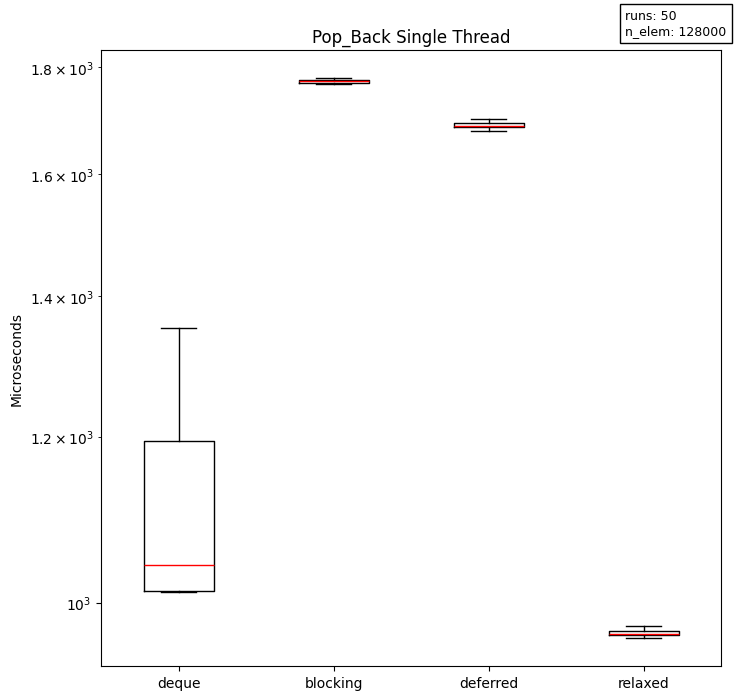


=== Pop_Front Single Thread ===
deque: 1256.5
blocking: 1758.0
deferred: 1675.5
relaxed: 972.0


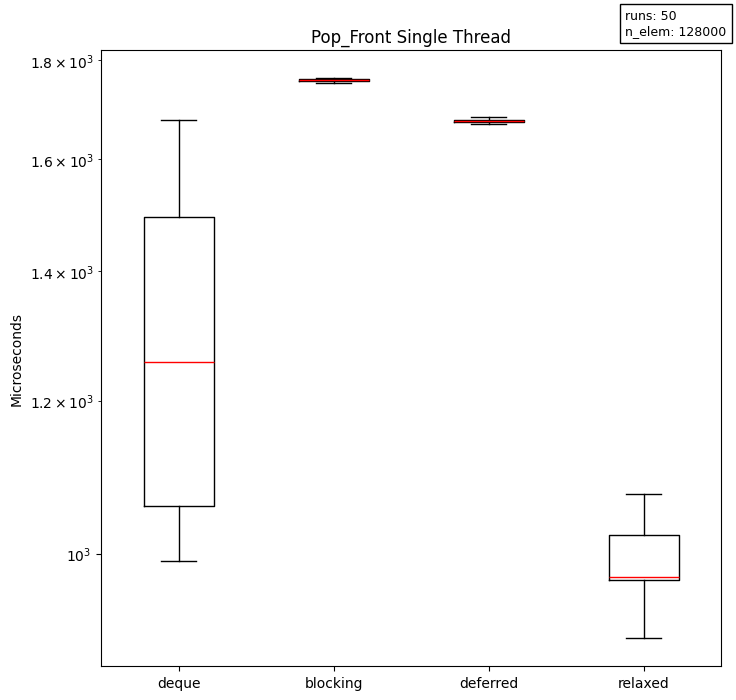


=== Push_Back Single Thread ===
deque: 1168.0
blocking: 1736.0
deferred: 1654.0
relaxed: 853.5


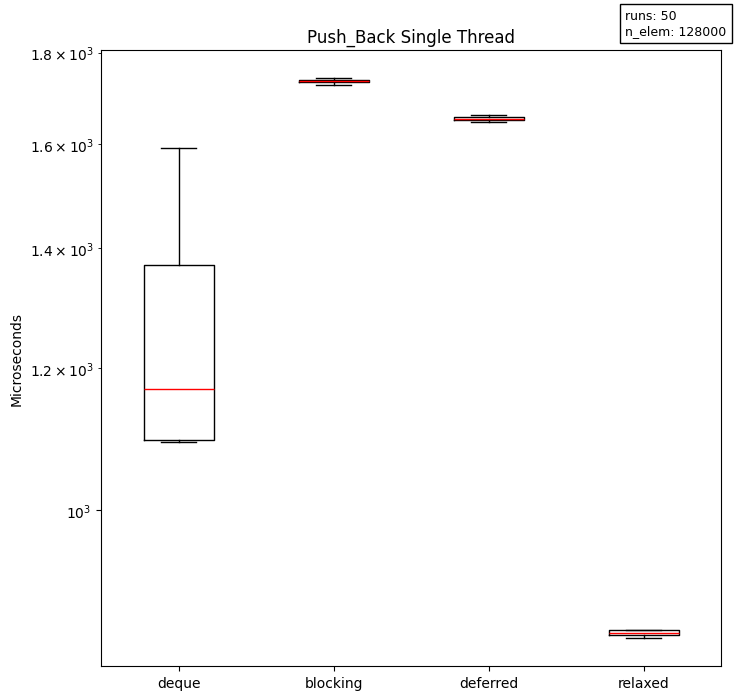


=== Push_Front Single Thread ===
deque: 1492.0
blocking: 1855.0
deferred: 1703.0
relaxed: 862.0


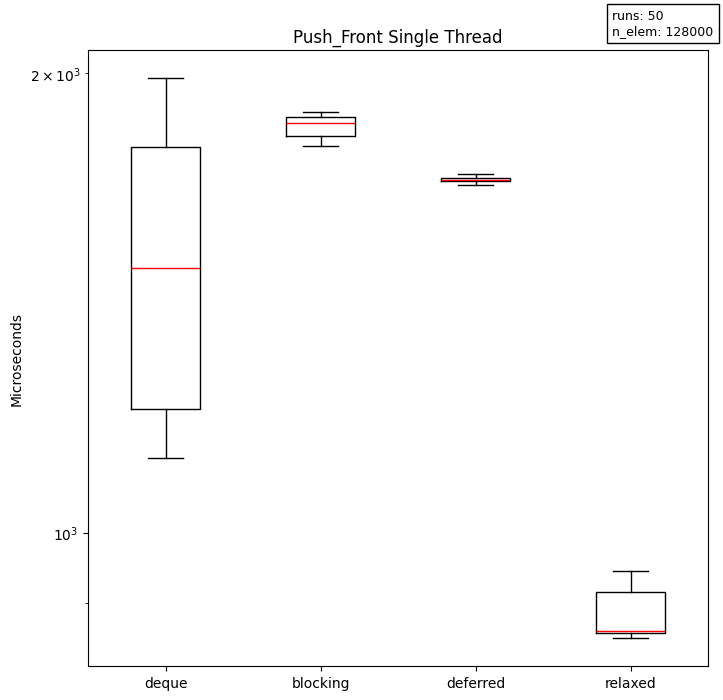

In [103]:
# dati test
nomi = ["deque", "blocking", "deferred", "relaxed"]

# ===================== DATI SINGLE THREAD =====================
# POP_BACK per thread single
dati_pop_back_single = [
    deque_Pop_Back_single,
    blocking_Pop_Back_single,
    deferred_Pop_Back_single,
    relaxed_Pop_Back_single
]

# POP_FRONT per thread single
dati_pop_front_single = [
    deque_Pop_Front_single,
    blocking_Pop_Front_single,
    deferred_Pop_Front_single,
    relaxed_Pop_Front_single
]

# PUSH_BACK per thread single
dati_push_back_single = [
    deque_Push_Back_single,
    blocking_Push_Back_single,
    deferred_Push_Back_single,
    relaxed_Push_Back_single
]

# PUSH_FRONT per thread single
dati_push_front_single = [
    deque_Push_Front_single,
    blocking_Push_Front_single,
    deferred_Push_Front_single,
    relaxed_Push_Front_single
]

n_elem = 128000

# ===================== Calcola e stampa le mediane =====================
print("=== Pop_Back Single Thread ===")
for nome, dati in zip(nomi, dati_pop_back_single):
    mediana = np.median(dati)
    print(f"{nome}: {mediana}")
plot(dati_pop_back_single, "Pop_Back Single Thread", nomi)

print("\n=== Pop_Front Single Thread ===")
for nome, dati in zip(nomi, dati_pop_front_single):
    mediana = np.median(dati)
    print(f"{nome}: {mediana}")
plot(dati_pop_front_single, "Pop_Front Single Thread", nomi)

print("\n=== Push_Back Single Thread ===")
for nome, dati in zip(nomi, dati_push_back_single):
    mediana = np.median(dati)
    print(f"{nome}: {mediana}")
plot(dati_push_back_single, "Push_Back Single Thread", nomi)

print("\n=== Push_Front Single Thread ===")
for nome, dati in zip(nomi, dati_push_front_single):
    mediana = np.median(dati)
    print(f"{nome}: {mediana}")
plot(dati_push_front_single, "Push_Front Single Thread", nomi)


## multithread

In [104]:
n_thread = [1,2,4,8,12,16] #,4,8,12,16] #,12,16] #hard code in .sh copialo da li
n_elem = 32000 ##hard code quando fai run di fie.sh

In [105]:
def multi_plot(data1, data2, data3, data4, title, labels, n_threads):
    fig, ax = plt.subplots(figsize=[10, 10])

    boxes = []
    colors = []
    group_positions = []  # Per le etichette centrate

    color_map = ["peachpuff", "orange", "yellow", "blue"]

    for i in range(len(n_threads)):
        boxes.extend([data1[i], data2[i], data3[i], data4[i]])
        colors.extend(color_map)
        # Ogni gruppo di 4 box parte alla posizione 4*i+1 → il centro è +1.5
        group_center = 4 * i + 2.5
        group_positions.append(group_center)

    # Crea boxplot
    bplot = ax.boxplot(boxes, showfliers=False, patch_artist=True)

    # Colori per ogni box
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    # Etichette centrate per ogni gruppo
    ax.set_xticks(group_positions)
    ax.set_xticklabels([str(n) for n in n_threads])

    # Etichette e titolo
    ax.set_ylabel('Microseconds')
    ax.set_xlabel('n_threads')
    ax.set_title(title, loc='left')
    ax.set_yscale('log')
    
    # Legenda (usiamo solo il primo gruppo per i colori)
    legend_handles = [bplot["boxes"][i] for i in range(4)]
    ax.legend(legend_handles, labels, loc='upper right')

    # Mediane in rosso
    for median in bplot['medians']:
        median.set_color('red')

    plt.figtext(0.78, 0.98, f"runs: {len(data1[0])}\nn_elem: {n_elem}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))

    plt.tight_layout()
    plt.show()

    # ======= Calcolo e stampa delle mediane numeriche =======
    print(f"\n=== Median values for {title} ===")
    medians = [np.median(b) for b in boxes]
    
    for i, n in enumerate(n_threads):
        print(f"\nThreads = {n}")
        for j, label in enumerate(labels):
            idx = i * 4 + j
            print(f"  {label:>12}: {medians[idx]:.2f}")


In [106]:
# ===================== DEQUE =====================
dati_deque_Push_Front_multi = [
    deque_Push_Front_multi_1,
    deque_Push_Front_multi_2,
    deque_Push_Front_multi_3,
    deque_Push_Front_multi_4,
    deque_Push_Front_multi_5,
    deque_Push_Front_multi_6,
    deque_Push_Front_multi_7,
    deque_Push_Front_multi_8
]

dati_deque_Push_Back_multi = [
    deque_Push_Back_multi_1,
    deque_Push_Back_multi_2,
    deque_Push_Back_multi_3,
    deque_Push_Back_multi_4,
    deque_Push_Back_multi_5,
    deque_Push_Back_multi_6,
    deque_Push_Back_multi_7,
    deque_Push_Back_multi_8
]

dati_deque_Pop_Front_multi = [
    deque_Pop_Front_multi_1,
    deque_Pop_Front_multi_2,
    deque_Pop_Front_multi_3,
    deque_Pop_Front_multi_4,
    deque_Pop_Front_multi_5,
    deque_Pop_Front_multi_6,
    deque_Pop_Front_multi_7,
    deque_Pop_Front_multi_8
]

dati_deque_Pop_Back_multi = [
    deque_Pop_Back_multi_1,
    deque_Pop_Back_multi_2,
    deque_Pop_Back_multi_3,
    deque_Pop_Back_multi_4,
    deque_Pop_Back_multi_5,
    deque_Pop_Back_multi_6,
    deque_Pop_Back_multi_7,
    deque_Pop_Back_multi_8
]

# ===================== RELAXED =====================
dati_relaxed_Push_Front_multi = [
    relaxed_Push_Front_multi_1,
    relaxed_Push_Front_multi_2,
    relaxed_Push_Front_multi_3,
    relaxed_Push_Front_multi_4,
    relaxed_Push_Front_multi_5,
    relaxed_Push_Front_multi_6,
    relaxed_Push_Front_multi_7,
    relaxed_Push_Front_multi_8
]

dati_relaxed_Push_Back_multi = [
    relaxed_Push_Back_multi_1,
    relaxed_Push_Back_multi_2,
    relaxed_Push_Back_multi_3,
    relaxed_Push_Back_multi_4,
    relaxed_Push_Back_multi_5,
    relaxed_Push_Back_multi_6,
    relaxed_Push_Back_multi_7,
    relaxed_Push_Back_multi_8
]

dati_relaxed_Pop_Front_multi = [
    relaxed_Pop_Front_multi_1,
    relaxed_Pop_Front_multi_2,
    relaxed_Pop_Front_multi_3,
    relaxed_Pop_Front_multi_4,
    relaxed_Pop_Front_multi_5,
    relaxed_Pop_Front_multi_6,
    relaxed_Pop_Front_multi_7,
    relaxed_Pop_Front_multi_8
]

dati_relaxed_Pop_Back_multi = [
    relaxed_Pop_Back_multi_1,
    relaxed_Pop_Back_multi_2,
    relaxed_Pop_Back_multi_3,
    relaxed_Pop_Back_multi_4,
    relaxed_Pop_Back_multi_5,
    relaxed_Pop_Back_multi_6,
    relaxed_Pop_Back_multi_7,
    relaxed_Pop_Back_multi_8
]

# ===================== DEFERRED =====================
dati_deferred_Push_Front_multi = [
    deferred_Push_Front_multi_1,
    deferred_Push_Front_multi_2,
    deferred_Push_Front_multi_3,
    deferred_Push_Front_multi_4,
    deferred_Push_Front_multi_5,
    deferred_Push_Front_multi_6,
    deferred_Push_Front_multi_7,
    deferred_Push_Front_multi_8
]

dati_deferred_Push_Back_multi = [
    deferred_Push_Back_multi_1,
    deferred_Push_Back_multi_2,
    deferred_Push_Back_multi_3,
    deferred_Push_Back_multi_4,
    deferred_Push_Back_multi_5,
    deferred_Push_Back_multi_6,
    deferred_Push_Back_multi_7,
    deferred_Push_Back_multi_8
]

dati_deferred_Pop_Front_multi = [
    deferred_Pop_Front_multi_1,
    deferred_Pop_Front_multi_2,
    deferred_Pop_Front_multi_3,
    deferred_Pop_Front_multi_4,
    deferred_Pop_Front_multi_5,
    deferred_Pop_Front_multi_6,
    deferred_Pop_Front_multi_7,
    deferred_Pop_Front_multi_8
]

dati_deferred_Pop_Back_multi = [
    deferred_Pop_Back_multi_1,
    deferred_Pop_Back_multi_2,
    deferred_Pop_Back_multi_3,
    deferred_Pop_Back_multi_4,
    deferred_Pop_Back_multi_5,
    deferred_Pop_Back_multi_6,
    deferred_Pop_Back_multi_7,
    deferred_Pop_Back_multi_8
]

# ===================== BLOCKING =====================
dati_blocking_Push_Front_multi = [
    blocking_Push_Front_multi_1,
    blocking_Push_Front_multi_2,
    blocking_Push_Front_multi_3,
    blocking_Push_Front_multi_4,
    blocking_Push_Front_multi_5,
    blocking_Push_Front_multi_6,
    blocking_Push_Front_multi_7,
    blocking_Push_Front_multi_8
]

dati_blocking_Push_Back_multi = [
    blocking_Push_Back_multi_1,
    blocking_Push_Back_multi_2,
    blocking_Push_Back_multi_3,
    blocking_Push_Back_multi_4,
    blocking_Push_Back_multi_5,
    blocking_Push_Back_multi_6,
    blocking_Push_Back_multi_7,
    blocking_Push_Back_multi_8
]

dati_blocking_Pop_Front_multi = [
    blocking_Pop_Front_multi_1,
    blocking_Pop_Front_multi_2,
    blocking_Pop_Front_multi_3,
    blocking_Pop_Front_multi_4,
    blocking_Pop_Front_multi_5,
    blocking_Pop_Front_multi_6,
    blocking_Pop_Front_multi_7,
    blocking_Pop_Front_multi_8
]

dati_blocking_Pop_Back_multi = [
    blocking_Pop_Back_multi_1,
    blocking_Pop_Back_multi_2,
    blocking_Pop_Back_multi_3,
    blocking_Pop_Back_multi_4,
    blocking_Pop_Back_multi_5,
    blocking_Pop_Back_multi_6,
    blocking_Pop_Back_multi_7,
    blocking_Pop_Back_multi_8
]


In [107]:
# ===================== DEQUE =====================
dati_deque_Push_Front_multi = [
    deque_Push_Front_multi_1,
    deque_Push_Front_multi_2,
    # deque_Push_Front_multi_3,
    deque_Push_Front_multi_4,
    # deque_Push_Front_multi_5,
    # deque_Push_Front_multi_6,
    # deque_Push_Front_multi_7,
    deque_Push_Front_multi_8,
    deque_Push_Front_multi_12,
    deque_Push_Front_multi_16
]

dati_deque_Push_Back_multi = [
    deque_Push_Back_multi_1,
    deque_Push_Back_multi_2,
    # deque_Push_Back_multi_3,
    deque_Push_Back_multi_4,
    # deque_Push_Back_multi_5,
    # deque_Push_Back_multi_6,
    # deque_Push_Back_multi_7,
    deque_Push_Back_multi_8,
    deque_Push_Back_multi_12,
    deque_Push_Back_multi_16
]

dati_deque_Pop_Front_multi = [
    deque_Pop_Front_multi_1,
    deque_Pop_Front_multi_2,
    # deque_Pop_Front_multi_3,
    deque_Pop_Front_multi_4,
    # deque_Pop_Front_multi_5,
    # deque_Pop_Front_multi_6,
    # deque_Pop_Front_multi_7,
    deque_Pop_Front_multi_8,
    deque_Pop_Front_multi_12,
    deque_Pop_Front_multi_16
]

dati_deque_Pop_Back_multi = [
    deque_Pop_Back_multi_1,
    deque_Pop_Back_multi_2,
    # deque_Pop_Back_multi_3,
    deque_Pop_Back_multi_4,
    # deque_Pop_Back_multi_5,
    # deque_Pop_Back_multi_6,
    # deque_Pop_Back_multi_7,
    deque_Pop_Back_multi_8,
    deque_Pop_Back_multi_12,
    deque_Pop_Back_multi_16
]

# ===================== RELAXED =====================
dati_relaxed_Push_Front_multi = [
    relaxed_Push_Front_multi_1,
    relaxed_Push_Front_multi_2,
    # relaxed_Push_Front_multi_3,
    relaxed_Push_Front_multi_4,
    # relaxed_Push_Front_multi_5,
    # relaxed_Push_Front_multi_6,
    # relaxed_Push_Front_multi_7,
    relaxed_Push_Front_multi_8,
    relaxed_Push_Front_multi_12,
    relaxed_Push_Front_multi_16
]

dati_relaxed_Push_Back_multi = [
    relaxed_Push_Back_multi_1,
    relaxed_Push_Back_multi_2,
    # relaxed_Push_Back_multi_3,
    relaxed_Push_Back_multi_4,
    # relaxed_Push_Back_multi_5,
    # relaxed_Push_Back_multi_6,
    # relaxed_Push_Back_multi_7,
    relaxed_Push_Back_multi_8,
    relaxed_Push_Back_multi_12,
    relaxed_Push_Back_multi_16
]

dati_relaxed_Pop_Front_multi = [
    relaxed_Pop_Front_multi_1,
    relaxed_Pop_Front_multi_2,
    # relaxed_Pop_Front_multi_3,
    relaxed_Pop_Front_multi_4,
    # relaxed_Pop_Front_multi_5,
    # relaxed_Pop_Front_multi_6,
    # relaxed_Pop_Front_multi_7,
    relaxed_Pop_Front_multi_8,
    relaxed_Pop_Front_multi_12,
    relaxed_Pop_Front_multi_16
]

dati_relaxed_Pop_Back_multi = [
    relaxed_Pop_Back_multi_1,
    relaxed_Pop_Back_multi_2,
    # relaxed_Pop_Back_multi_3,
    relaxed_Pop_Back_multi_4,
    # relaxed_Pop_Back_multi_5,
    # relaxed_Pop_Back_multi_6,
    # relaxed_Pop_Back_multi_7,
    relaxed_Pop_Back_multi_8,
    relaxed_Pop_Back_multi_12,
    relaxed_Pop_Back_multi_16
]

# ===================== DEFERRED =====================
dati_deferred_Push_Front_multi = [
    deferred_Push_Front_multi_1,
    deferred_Push_Front_multi_2,
    # deferred_Push_Front_multi_3,
    deferred_Push_Front_multi_4,
    # deferred_Push_Front_multi_5,
    # deferred_Push_Front_multi_6,
    # deferred_Push_Front_multi_7,
    deferred_Push_Front_multi_8,
    deferred_Push_Front_multi_12,
    deferred_Push_Front_multi_16
]

dati_deferred_Push_Back_multi = [
    deferred_Push_Back_multi_1,
    deferred_Push_Back_multi_2,
    # deferred_Push_Back_multi_3,
    deferred_Push_Back_multi_4,
    # deferred_Push_Back_multi_5,
    # deferred_Push_Back_multi_6,
    # deferred_Push_Back_multi_7,
    deferred_Push_Back_multi_8,
    deferred_Push_Back_multi_12,
    deferred_Push_Back_multi_16
]

dati_deferred_Pop_Front_multi = [
    deferred_Pop_Front_multi_1,
    deferred_Pop_Front_multi_2,
    # deferred_Pop_Front_multi_3,
    deferred_Pop_Front_multi_4,
    # deferred_Pop_Front_multi_5,
    # deferred_Pop_Front_multi_6,
    # deferred_Pop_Front_multi_7,
    deferred_Pop_Front_multi_8,
    deferred_Pop_Front_multi_12,
    deferred_Pop_Front_multi_16
]

dati_deferred_Pop_Back_multi = [
    deferred_Pop_Back_multi_1,
    deferred_Pop_Back_multi_2,
    # deferred_Pop_Back_multi_3,
    deferred_Pop_Back_multi_4,
    # deferred_Pop_Back_multi_5,
    # deferred_Pop_Back_multi_6,
    # deferred_Pop_Back_multi_7,
    deferred_Pop_Back_multi_8,
    deferred_Pop_Back_multi_12,
    deferred_Pop_Back_multi_16
]

# ===================== BLOCKING =====================
dati_blocking_Push_Front_multi = [
    blocking_Push_Front_multi_1,
    blocking_Push_Front_multi_2,
    # blocking_Push_Front_multi_3,
    blocking_Push_Front_multi_4,
    # blocking_Push_Front_multi_5,
    # blocking_Push_Front_multi_6,
    # blocking_Push_Front_multi_7,
    blocking_Push_Front_multi_8,
    blocking_Push_Front_multi_12,
    blocking_Push_Front_multi_16
]

dati_blocking_Push_Back_multi = [
    blocking_Push_Back_multi_1,
    blocking_Push_Back_multi_2,
    # blocking_Push_Back_multi_3,
    blocking_Push_Back_multi_4,
    # blocking_Push_Back_multi_5,
    # blocking_Push_Back_multi_6,
    # blocking_Push_Back_multi_7,
    blocking_Push_Back_multi_8,
    blocking_Push_Back_multi_12,
    blocking_Push_Back_multi_16
]

dati_blocking_Pop_Front_multi = [
    blocking_Pop_Front_multi_1,
    blocking_Pop_Front_multi_2,
    # blocking_Pop_Front_multi_3,
    blocking_Pop_Front_multi_4,
    # blocking_Pop_Front_multi_5,
    # blocking_Pop_Front_multi_6,
    # blocking_Pop_Front_multi_7,
    blocking_Pop_Front_multi_8,
    blocking_Pop_Front_multi_12,
    blocking_Pop_Front_multi_16
]

dati_blocking_Pop_Back_multi = [
    blocking_Pop_Back_multi_1,
    blocking_Pop_Back_multi_2,
    # blocking_Pop_Back_multi_3,
    blocking_Pop_Back_multi_4,
    # blocking_Pop_Back_multi_5,
    # blocking_Pop_Back_multi_6,
    # blocking_Pop_Back_multi_7,
    blocking_Pop_Back_multi_8,
    blocking_Pop_Back_multi_12,
    blocking_Pop_Back_multi_16
]


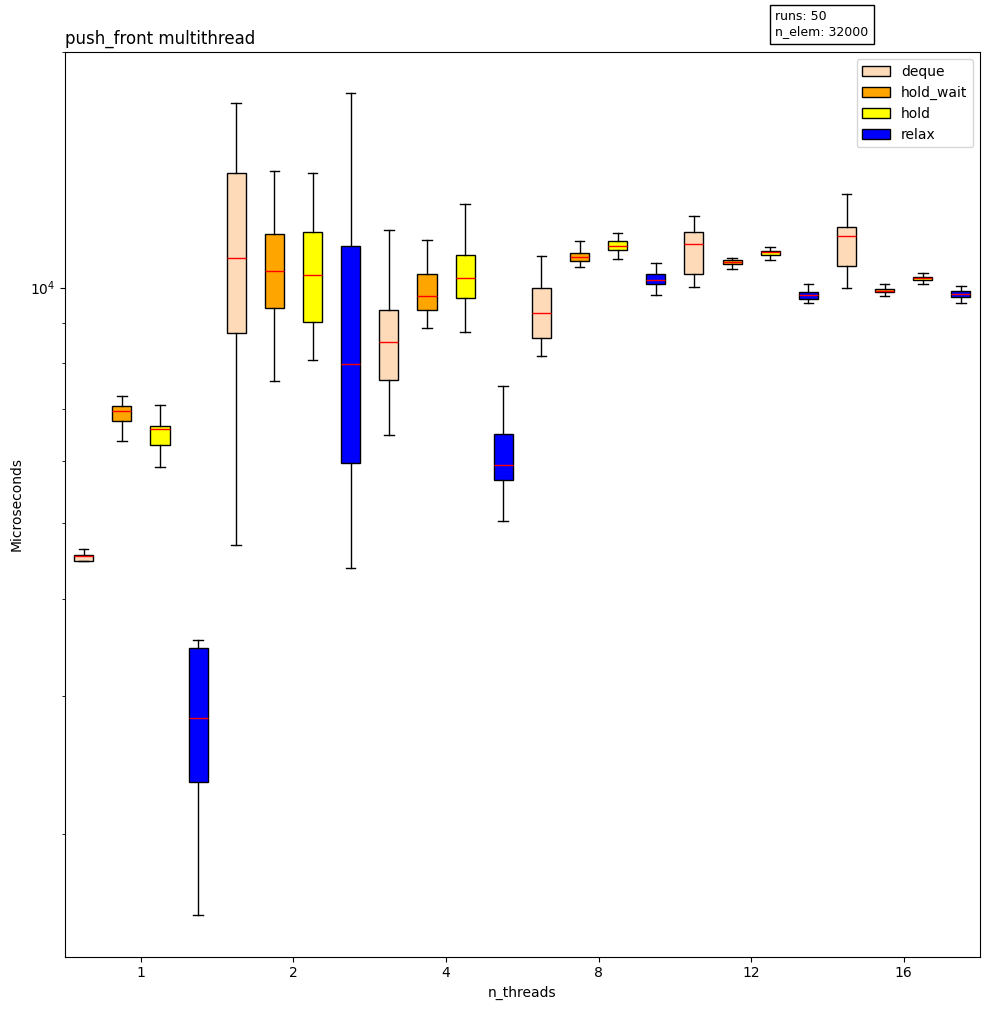


=== Median values for push_front multithread ===

Threads = 1
         deque: 4529.00
     hold_wait: 6950.50
          hold: 6595.00
         relax: 2811.00

Threads = 2
         deque: 10914.50
     hold_wait: 10491.00
          hold: 10393.00
         relax: 7980.50

Threads = 4
         deque: 8514.50
     hold_wait: 9747.00
          hold: 10272.00
         relax: 5925.00

Threads = 8
         deque: 9284.00
     hold_wait: 10944.00
          hold: 11312.50
         relax: 10221.50

Threads = 12
         deque: 11365.00
     hold_wait: 10782.00
          hold: 11093.50
         relax: 9773.00

Threads = 16
         deque: 11639.50
     hold_wait: 9898.50
          hold: 10273.00
         relax: 9812.50


In [108]:
multi_plot(dati_deque_Push_Front_multi, dati_blocking_Push_Front_multi, dati_deferred_Push_Front_multi,dati_relaxed_Push_Front_multi , "push_front multithread", ["deque","hold_wait","hold","relax"], n_thread)

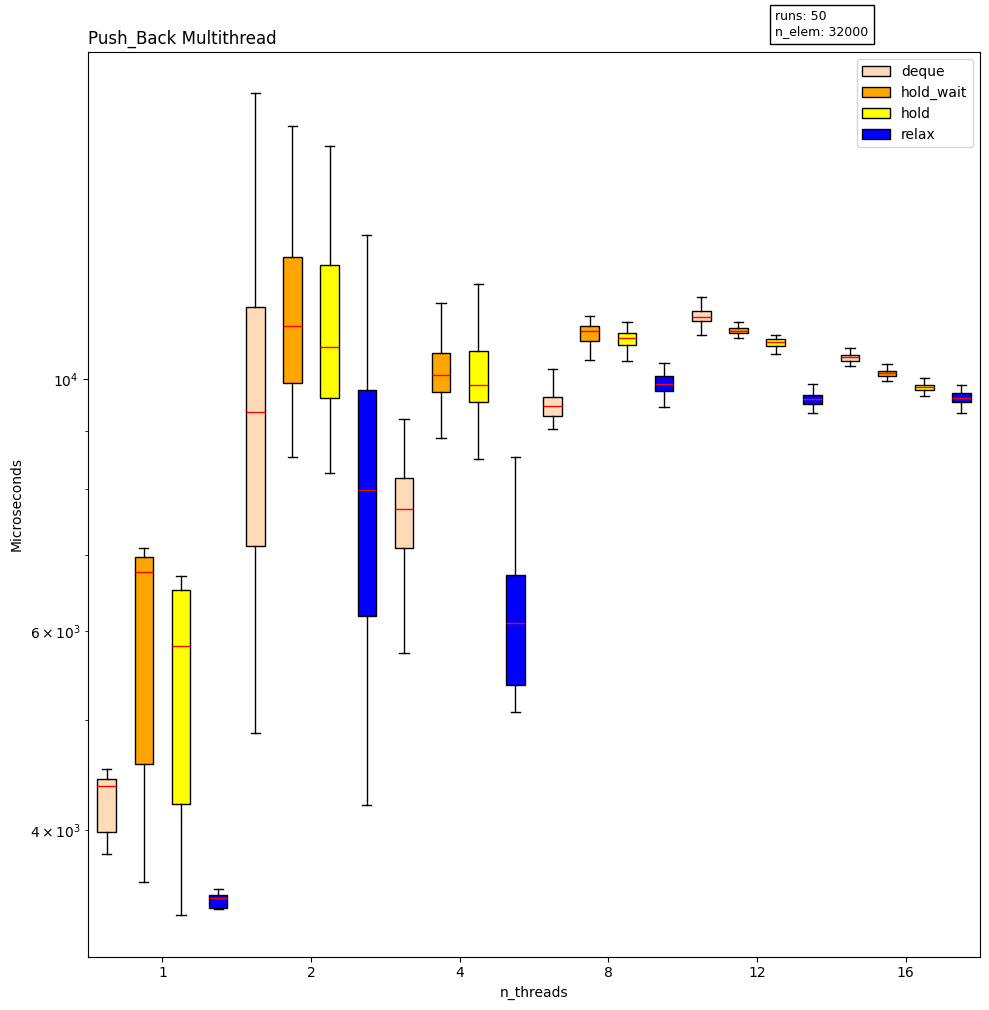


=== Median values for Push_Back Multithread ===

Threads = 1
         deque: 4374.00
     hold_wait: 6760.00
          hold: 5820.50
         relax: 3489.00

Threads = 2
         deque: 9356.50
     hold_wait: 11142.50
          hold: 10684.00
         relax: 7982.50

Threads = 4
         deque: 7683.00
     hold_wait: 10097.00
          hold: 9889.00
         relax: 6093.50

Threads = 8
         deque: 9476.50
     hold_wait: 11026.00
          hold: 10876.00
         relax: 9902.00

Threads = 12
         deque: 11342.00
     hold_wait: 11041.50
          hold: 10793.50
         relax: 9604.00

Threads = 16
         deque: 10455.50
     hold_wait: 10127.50
          hold: 9849.50
         relax: 9637.00


In [109]:
multi_plot(
    dati_deque_Push_Back_multi,
    dati_blocking_Push_Back_multi,
    dati_deferred_Push_Back_multi,
    dati_relaxed_Push_Back_multi,
    "Push_Back Multithread",
    ["deque","hold_wait","hold","relax"], n_thread
)

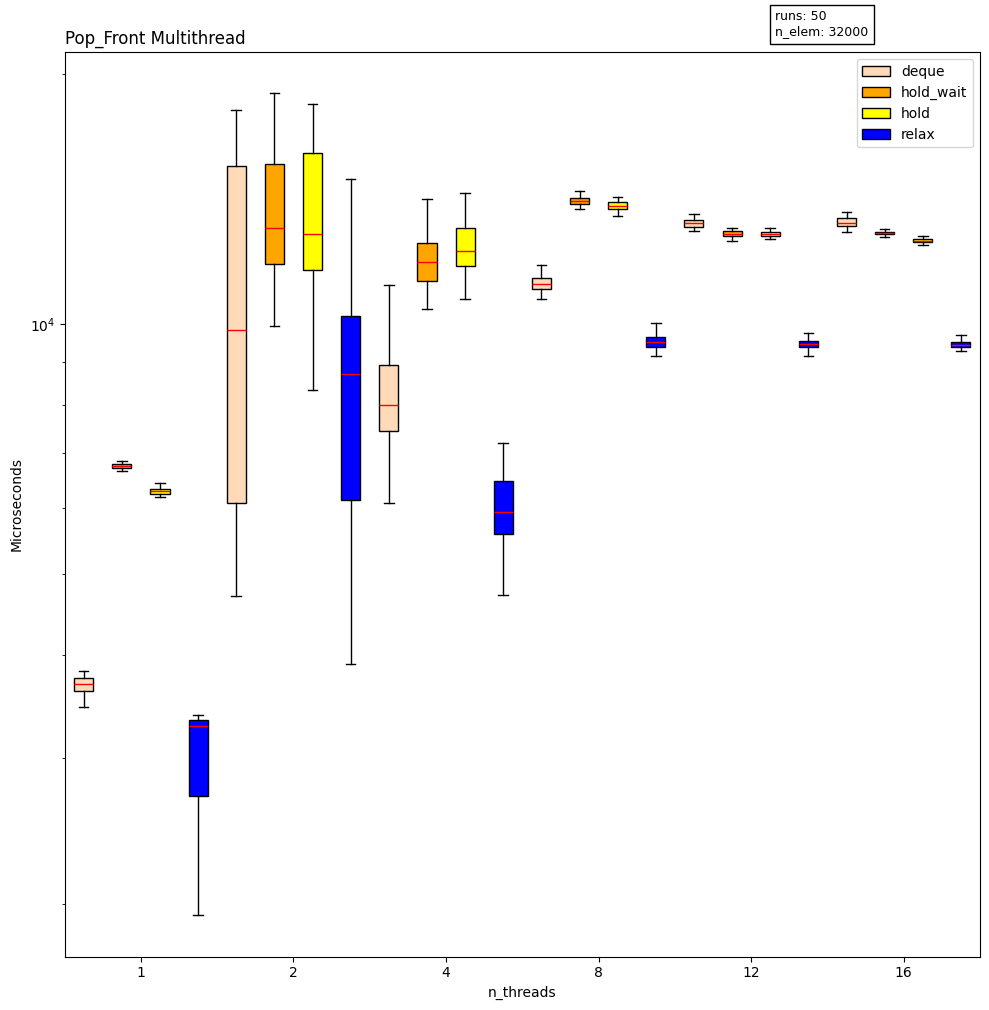


=== Median values for Pop_Front Multithread ===

Threads = 1
         deque: 3681.50
     hold_wait: 6748.00
          hold: 6295.50
         relax: 3284.50

Threads = 2
         deque: 9826.50
     hold_wait: 13049.50
          hold: 12847.50
         relax: 8701.50

Threads = 4
         deque: 7986.00
     hold_wait: 11879.00
          hold: 12241.50
         relax: 5942.50

Threads = 8
         deque: 11165.00
     hold_wait: 14088.00
          hold: 13893.00
         relax: 9522.00

Threads = 12
         deque: 13256.00
     hold_wait: 12847.00
          hold: 12838.00
         relax: 9474.50

Threads = 16
         deque: 13250.00
     hold_wait: 12867.00
          hold: 12604.00
         relax: 9438.50


In [110]:
multi_plot(
    dati_deque_Pop_Front_multi,
    dati_blocking_Pop_Front_multi,
    dati_deferred_Pop_Front_multi,
    dati_relaxed_Pop_Front_multi,
    "Pop_Front Multithread",
    ["deque","hold_wait","hold","relax"], n_thread
)

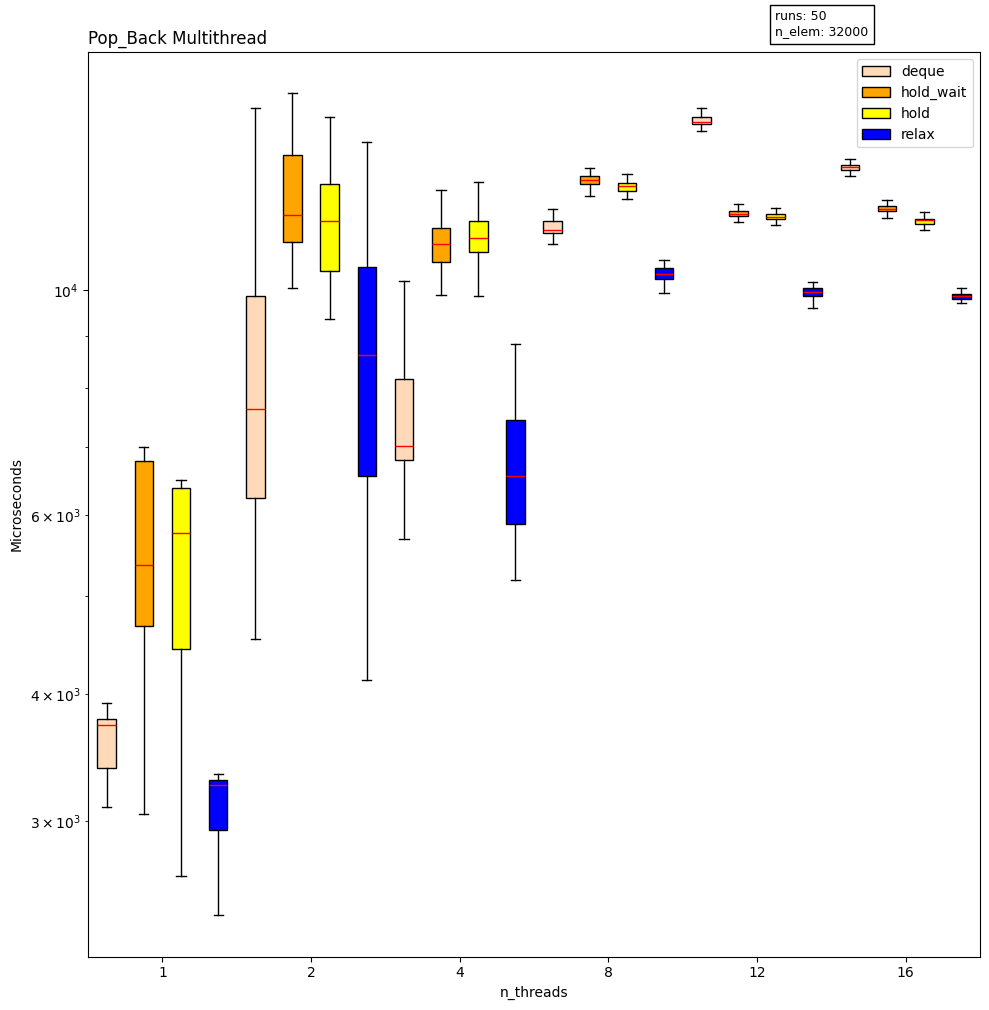


=== Median values for Pop_Back Multithread ===

Threads = 1
         deque: 3730.00
     hold_wait: 5359.50
          hold: 5764.50
         relax: 3257.50

Threads = 2
         deque: 7625.00
     hold_wait: 11835.00
          hold: 11675.00
         relax: 8631.50

Threads = 4
         deque: 7010.50
     hold_wait: 11082.00
          hold: 11241.00
         relax: 6552.00

Threads = 8
         deque: 11464.00
     hold_wait: 12817.50
          hold: 12648.50
         relax: 10366.00

Threads = 12
         deque: 14634.50
     hold_wait: 11876.00
          hold: 11792.50
         relax: 9960.00

Threads = 16
         deque: 13217.00
     hold_wait: 12015.00
          hold: 11700.50
         relax: 9858.50


In [111]:
multi_plot(
    dati_deque_Pop_Back_multi,
    dati_blocking_Pop_Back_multi,
    dati_deferred_Pop_Back_multi,
    dati_relaxed_Pop_Back_multi,
    "Pop_Back Multithread",
    ["deque","hold_wait","hold","relax"], n_thread
)

## Random

In [116]:
# ===================== DEQUE =====================
dati_deque_random_multi = [
    deque_random_multi_1,
    deque_random_multi_2,
    #deque_random_multi_3,
    deque_random_multi_4,
    #deque_random_multi_5,
    #deque_random_multi_6,
    #deque_random_multi_7,
    deque_random_multi_8,
    deque_random_multi_12,
    deque_random_multi_16
]

# ===================== RELAXED =====================
dati_relaxed_random_multi = [
    relaxed_random_multi_1,
    relaxed_random_multi_2,
    #relaxed_random_multi_3,
    relaxed_random_multi_4,
    #relaxed_random_multi_5,
    #relaxed_random_multi_6,
    #relaxed_random_multi_7,
    relaxed_random_multi_8,
    relaxed_random_multi_12,
    relaxed_random_multi_16
]

# ===================== DEFERRED =====================
dati_deferred_random_multi = [
    deferred_random_multi_1,
    deferred_random_multi_2,
    #deferred_random_multi_3,
    deferred_random_multi_4,
    #deferred_random_multi_5,
    #deferred_random_multi_6,
    #deferred_random_multi_7,
    deferred_random_multi_8,
    deferred_random_multi_12,
    deferred_random_multi_16
]

# ===================== BLOCKING =====================
dati_blocking_random_multi = [
    blocking_random_multi_1,
    blocking_random_multi_2,
    #blocking_random_multi_3,
    blocking_random_multi_4,
    #blocking_random_multi_5,
    #blocking_random_multi_6,
    #blocking_random_multi_7,
    blocking_random_multi_8,
    blocking_random_multi_12,
    blocking_random_multi_16
]


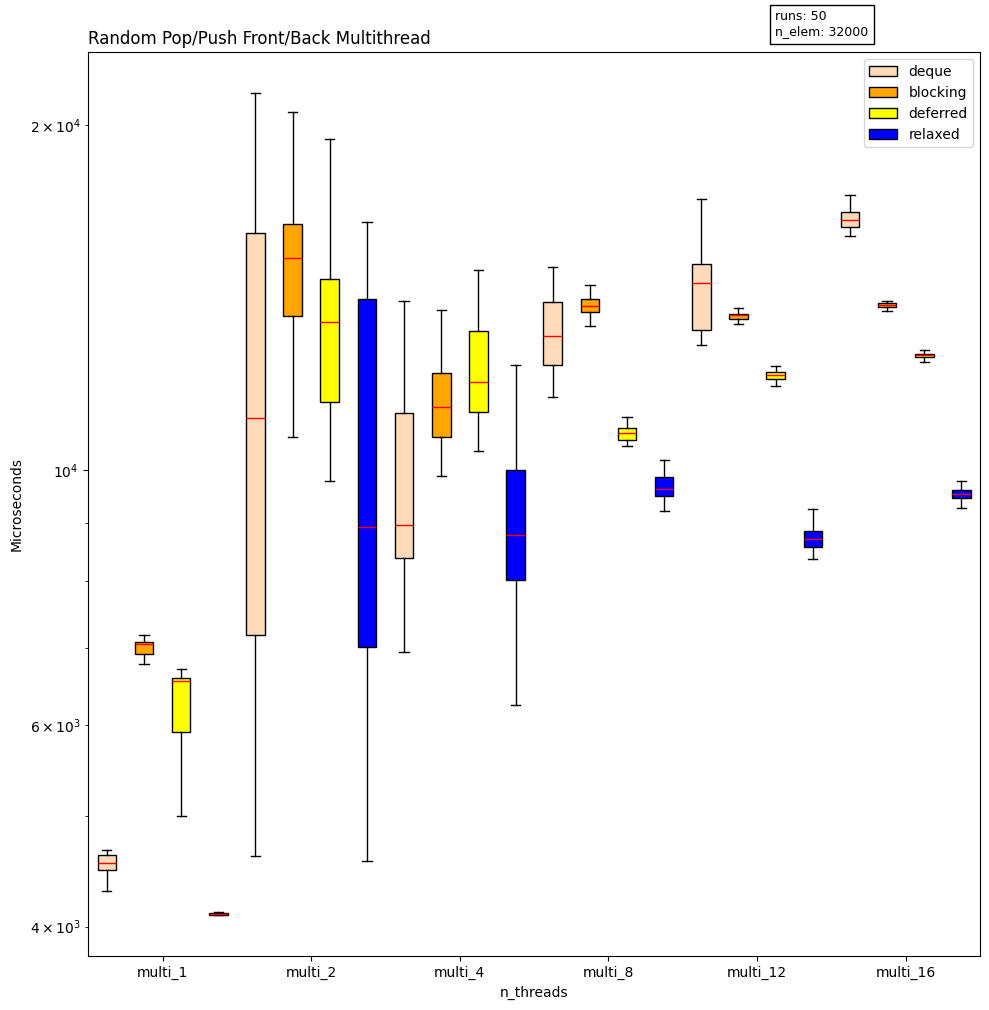


=== Median values for Random Pop/Push Front/Back Multithread ===

Threads = multi_1
         deque: 4548.00
      blocking: 7062.00
      deferred: 6548.50
       relaxed: 4106.50

Threads = multi_2
         deque: 11112.50
      blocking: 15307.50
      deferred: 13473.00
       relaxed: 8915.00

Threads = multi_4
         deque: 8955.50
      blocking: 11359.50
      deferred: 11941.00
       relaxed: 8784.50

Threads = multi_8
         deque: 13102.50
      blocking: 13903.00
      deferred: 10771.00
       relaxed: 9635.00

Threads = multi_12
         deque: 14562.00
      blocking: 13648.50
      deferred: 12103.50
       relaxed: 8710.00

Threads = multi_16
         deque: 16520.50
      blocking: 13934.50
      deferred: 12595.50
       relaxed: 9543.00


In [118]:
multi_plot(
    dati_deque_random_multi,
    dati_blocking_random_multi,
    dati_deferred_random_multi,
    dati_relaxed_random_multi,
    "Random Pop/Push Front/Back Multithread",
    ["deque","blocking","deferred","relaxed"],
    #["multi_1", "multi_2", "multi_3", "multi_4","multi_5", "multi_6", "multi_7", "multi_8"]
    ["multi_1", "multi_2","multi_4", "multi_8","multi_12", "multi_16"]
)
